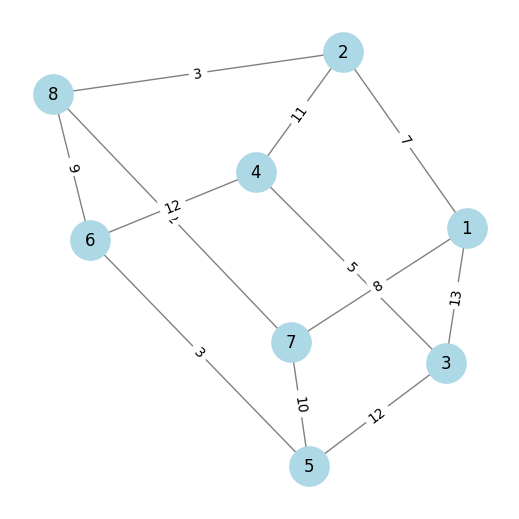

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.Graph()

# 간선 추가
edges = [
    (1, 2, 7), (1, 3, 13), (1, 7, 8),
    (2, 4, 11), (2, 8, 3),
    (3, 4, 5), (3, 5, 12),
    (4, 6, 12),
    (5, 6, 3), (5, 7, 10),
    (6, 8, 9),
    (7, 8, 2)
]
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# 레이아웃 (자동 위치 또는 수동 설정 가능)
pos = nx.spring_layout(G, seed=42)  # 또는 원하는 위치 수동 설정

# 노드 및 간선 그리기
plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=12, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

# 제목 및 시각화
plt.axis('off')
plt.show()

In [3]:
import numpy as np

# ✅ 1. 간선 정보: (노드1, 노드2, 가중치)
edges = [
    (1, 2, 7), (1, 3, 13), (1, 7, 8),
    (2, 4, 11), (2, 8, 3),
    (3, 4, 5), (3, 5, 12),
    (4, 6, 12),
    (5, 6, 3), (5, 7, 10),
    (6, 8, 9),
    (7, 8, 2)
]

# ✅ 2. 노드 수 확인 (노드 1~8 → 총 8개)
num_nodes = 8

# ✅ 3. 간선을 가중치 기준으로 오름차순 정렬 (가장 싼 것부터 선택하기 위해)
edges = sorted(edges, key=lambda x: x[2])

# ✅ 4. 유니온 파인드를 위한 부모 배열 초기화
# parent[i] = i 이면, i는 자기 자신이 대표 (처음엔 각각 독립된 집합)
parent = np.arange(num_nodes + 1)  # 노드 번호 1부터 시작 → index 0은 사용 안 함

# ✅ 5. find 함수: 노드 x의 집합 대표(루트)를 찾음
# 경로 압축 기법을 통해 탐색 효율 향상
def find(x):
    while parent[x] != x:
        parent[x] = parent[parent[x]]  # 부모를 조상으로 바로 연결 (경로 압축)
        x = parent[x]
    return x

# ✅ 6. Kruskal 알고리즘 수행
mst = []  # MST에 포함될 간선들을 저장할 리스트
total_weight = 0  # MST의 총 가중치

for u, v, w in edges:
    # u와 v의 집합이 다르면 사이클이 아님 → 간선 선택
    root_u = find(u)
    root_v = find(v)
    if root_u != root_v:
        # ✅ 간선 (u, v, w) 선택!
        mst.append((u, v, w))
        total_weight += w
        # 두 집합을 병합 (union)
        parent[root_v] = root_u
    else:
        # ✅ u와 v가 이미 같은 집합 → 사이클 생김 → 간선 버림
        pass

# ✅ 7. 결과 출력
print("최소신장트리(MST)에 포함된 간선들:")
for u, v, w in mst:
    print(f"  노드 {u} – 노드 {v}, 가중치: {w}")

print(f"\n총 가중치 합: {total_weight}")

최소신장트리(MST)에 포함된 간선들:
  노드 7 – 노드 8, 가중치: 2
  노드 2 – 노드 8, 가중치: 3
  노드 5 – 노드 6, 가중치: 3
  노드 3 – 노드 4, 가중치: 5
  노드 1 – 노드 2, 가중치: 7
  노드 6 – 노드 8, 가중치: 9
  노드 2 – 노드 4, 가중치: 11

총 가중치 합: 40


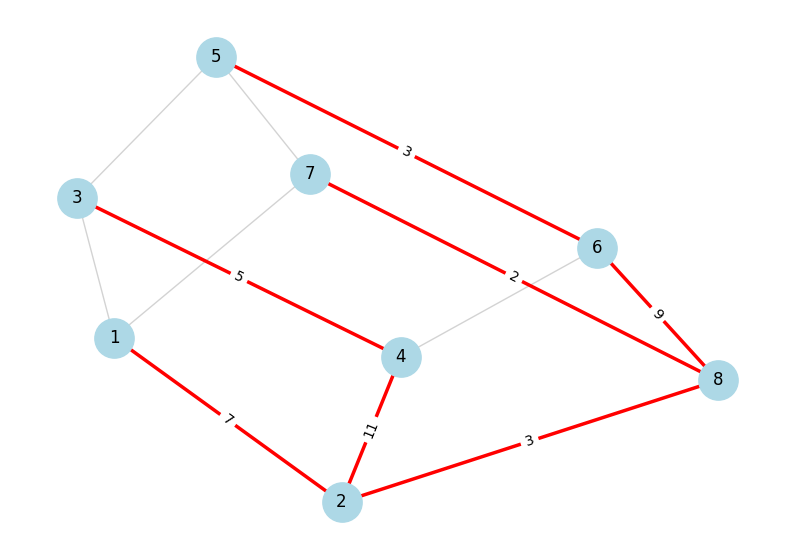

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# 전체 그래프 생성
G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

# MST 그래프 생성
MST = nx.Graph()
for u, v, w in mst:
    MST.add_edge(u, v, weight=w)

# 레이아웃 설정 (spring_layout은 보기 좋은 자동 배치)
pos = nx.spring_layout(G, seed=42)

# 전체 그래프 (연한 회색으로 배경용)
plt.figure(figsize=(10, 7))
nx.draw_networkx_edges(G, pos, edge_color='lightgray', width=1)
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
nx.draw_networkx_labels(G, pos, font_size=12)

# MST 강조 (굵고 빨간색)
nx.draw_networkx_edges(MST, pos, edge_color='red', width=2.5)

# 간선 가중치 표시 (MST에 대해서만)
edge_labels = nx.get_edge_attributes(MST, 'weight')
nx.draw_networkx_edge_labels(MST, pos, edge_labels=edge_labels, font_color='black', font_size=10)

# 제목 및 표시
plt.axis('off')
plt.show()


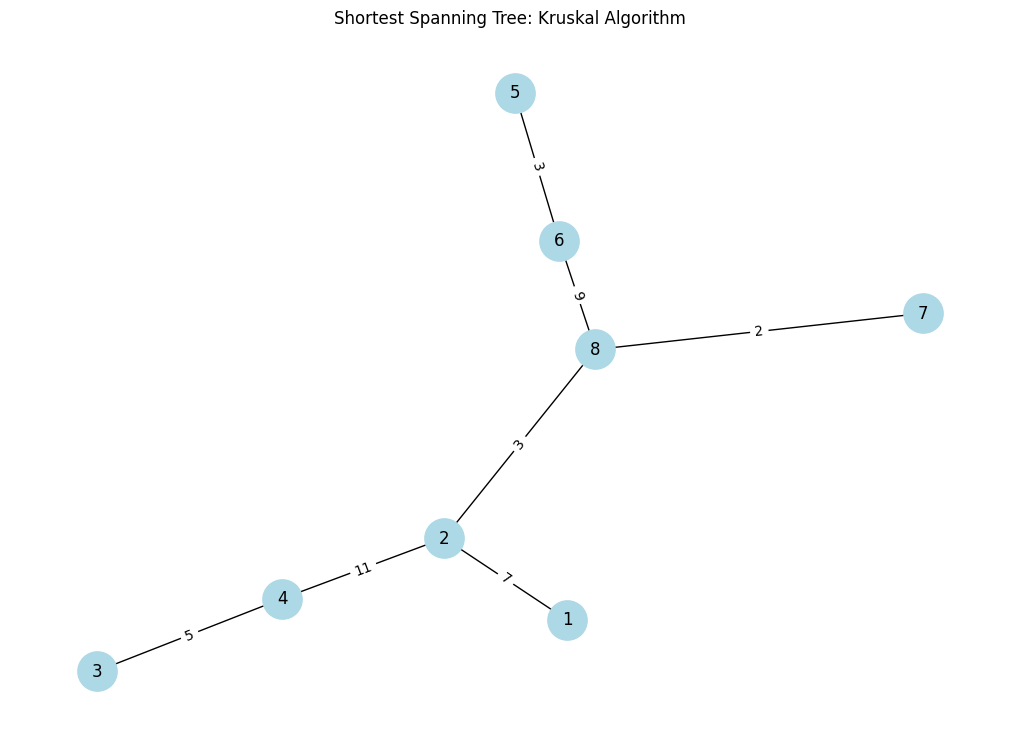

In [5]:
# 함수로 만듦

import numpy as np
import networkx as nx

def kruskal_to_graph(edges, num_nodes):
    # 간선 가중치 기준 정렬
    edges = sorted(edges, key=lambda x: x[2])
    
    # 유니온 파인드 초기화 (1-based indexing)
    parent = np.arange(num_nodes + 1)
    
    # find 함수 (경로 압축)
    def find(x):
        while parent[x] != x:
            parent[x] = parent[parent[x]]
            x = parent[x]
        return x

    # MST 저장용 그래프 생성
    mst_graph = nx.Graph()
    
    # Kruskal 알고리즘 수행
    for u, v, w in edges:
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            mst_graph.add_edge(u, v, weight=w)
            parent[root_v] = root_u  # union

    return mst_graph


# 간선 정보
edges = [
    (1, 2, 7), (1, 3, 13), (1, 7, 8),
    (2, 4, 11), (2, 8, 3),
    (3, 4, 5), (3, 5, 12),
    (4, 6, 12),
    (5, 6, 3), (5, 7, 10),
    (6, 8, 9),
    (7, 8, 2)
]

num_nodes = 8

# 함수 호출
mst_graph = kruskal_to_graph(edges, num_nodes)

pos = nx.spring_layout(mst_graph, seed=42)
plt.figure(figsize=(10, 7))
nx.draw(mst_graph, pos, with_labels=True, node_color='lightblue', node_size=800)
edge_labels = nx.get_edge_attributes(mst_graph, 'weight')
nx.draw_networkx_edge_labels(mst_graph, pos, edge_labels=edge_labels)
plt.title("Shortest Spanning Tree: Kruskal Algorithm")
plt.axis('off')
plt.show()